In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/서울시 주거실태조사/total_df.csv')
df.head()

,ID,SIGUNGU,housing_cat,satis,num_of_mem,sex,age,total_asset,year,owning
0,325,20,2,3,2,3,38,600.0,2020,0
1,415,12,6,3,3,3,38,40000.0,2020,1
2,437,5,4,3,1,2,72,40000.0,2020,1
3,438,5,4,3,3,3,72,49000.0,2020,1
4,439,5,4,3,1,2,78,50000.0,2020,1


## 연령대, 성별, 가구원수 가지고 클러스터링

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

onehot = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

default = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("age", default, ["age"]),
    ("num_of_mem", default, ['num_of_mem']),
    ("sex", onehot, ['sex'])],
    remainder = 'drop')

In [7]:
prepared = preprocessing.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

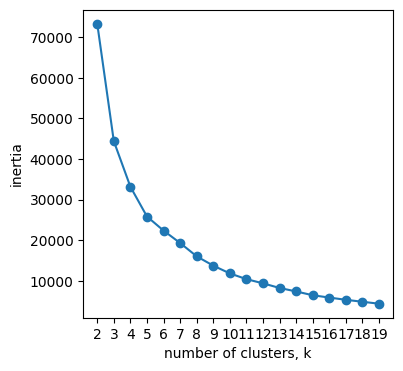

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(2,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(prepared)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(prepared)
df['class'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


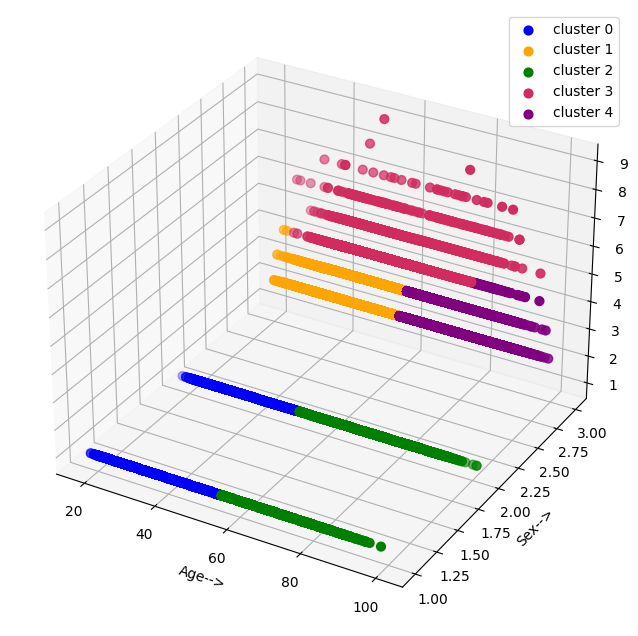

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df[['age','sex','num_of_mem','class']]
y_clusters = df['class']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[x['class']==0].iloc[:,0],x[x['class']==0].iloc[:,1],x[x['class']==0].iloc[:,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[x['class']==1].iloc[:,0],x[x['class']==1].iloc[:,1],x[x['class']==1].iloc[:,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[x['class']==2].iloc[:,0],x[x['class']==2].iloc[:,1],x[x['class']==2].iloc[:,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[x['class']==3].iloc[:,0],x[x['class']==3].iloc[:,1],x[x['class']==3].iloc[:,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[x['class']==4].iloc[:,0],x[x['class']==4].iloc[:,1],x[x['class']==4].iloc[:,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age-->')
ax.set_ylabel('Sex-->')
ax.set_zlabel('# of members -->')
ax.legend()
plt.show()

## 연령대, 가구원수 가지고 클러스터링

In [35]:
twodim = df[['age','num_of_mem']]
SimpleImputer(strategy='median').fit_transform(twodim)
StandardScaler().fit_transform(twodim)

array([[-1.13516061, -0.30357667],
       [-1.13516061,  0.55347199],
       [ 0.96046065, -1.16062534],
       ...,
       [-1.56661205, -1.16062534],
       [-1.87479165, -1.16062534],
       [ 0.4673733 , -1.16062534]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

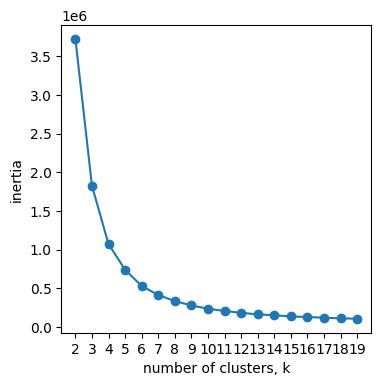

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(2,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(twodim)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [49]:
twodim_model = KMeans(n_clusters=6)
twodim_model.fit(twodim)
df['twodim_class'] = twodim_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


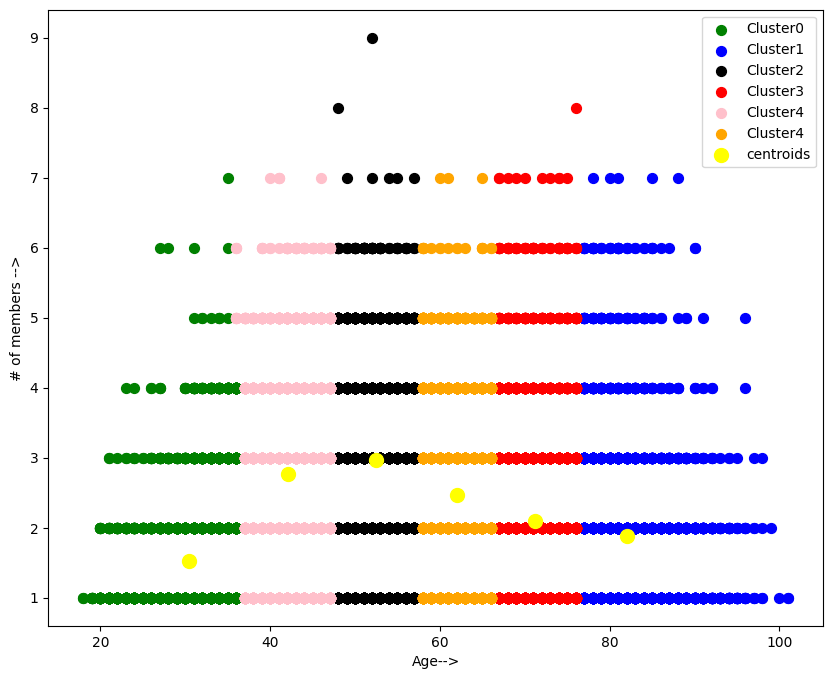

In [66]:
x = df[['age','num_of_mem','twodim_class']]
y_clusters = df['twodim_class']

plt.figure(figsize = (10,8))
plt.scatter(x[x['twodim_class']==0].iloc[:,0],x[x['twodim_class']==0].iloc[:,1],s = 50, c = 'green', label = "Cluster0")
plt.scatter(x[x['twodim_class']==1].iloc[:,0],x[x['twodim_class']==1].iloc[:,1],s = 50, c = 'blue', label = "Cluster1")
plt.scatter(x[x['twodim_class']==2].iloc[:,0],x[x['twodim_class']==2].iloc[:,1],s = 50, c = 'black', label = "Cluster2")
plt.scatter(x[x['twodim_class']==3].iloc[:,0],x[x['twodim_class']==3].iloc[:,1],s = 50, c = 'red', label = "Cluster3")
plt.scatter(x[x['twodim_class']==4].iloc[:,0],x[x['twodim_class']==4].iloc[:,1],s = 50, c = 'pink', label = "Cluster4")
plt.scatter(x[x['twodim_class']==5].iloc[:,0],x[x['twodim_class']==5].iloc[:,1],s = 50, c = 'orange', label = "Cluster4")
plt.scatter(twodim_model.cluster_centers_[:,0],twodim_model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel('Age-->')
plt.ylabel('# of members -->')
plt.legend()
plt.show()

## 연령대, 가구원수, 총자산 가지고 클러스터링

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

default = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("age", default, ["age"]),
    ("num_of_mem", default, ['num_of_mem']),
    ("asset", default, ['total_asset'])],
    remainder = 'drop')

In [42]:
prepared2 = preprocessing.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

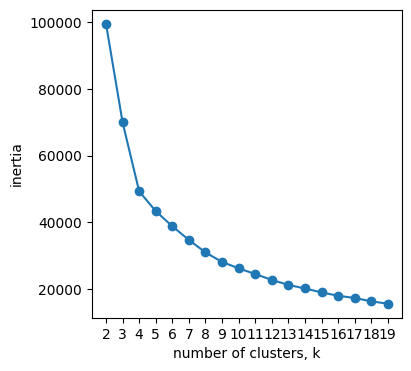

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(2,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(prepared2)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [54]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(prepared2)
df['class2'] = kmeans2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


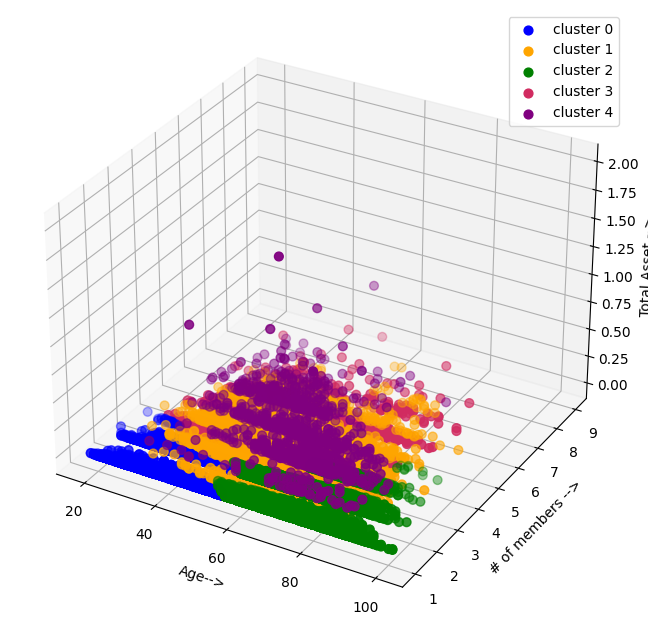

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df[['age','num_of_mem','total_asset','class2']]
y_clusters = df['class2']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[x['class2']==0].iloc[:,0],x[x['class2']==0].iloc[:,1],x[x['class2']==0].iloc[:,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[x['class2']==1].iloc[:,0],x[x['class2']==1].iloc[:,1],x[x['class2']==1].iloc[:,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[x['class2']==2].iloc[:,0],x[x['class2']==2].iloc[:,1],x[x['class2']==2].iloc[:,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[x['class2']==3].iloc[:,0],x[x['class2']==3].iloc[:,1],x[x['class2']==3].iloc[:,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[x['class2']==4].iloc[:,0],x[x['class2']==4].iloc[:,1],x[x['class2']==4].iloc[:,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age-->')
ax.set_ylabel('# of members -->')
ax.set_zlabel('Total Asset -->')
ax.legend()
plt.show()

In [55]:
import plotly.graph_objs as go

Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = '# of Members--->'),zaxis = dict(title  = 'Total Asset-->'))
x = df[['age','num_of_mem','total_asset']].values
labels = kmeans2.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# 무엇이 제일 좋은 클러스터링 일까 ..

In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [63]:
col = 'class2' #class, twodim_class, class2 로 변경해가면서 보면 됨
df.groupby(col)['housing_cat'].value_counts()

class2  housing_cat
0       2              2701
        6              2282
        8              1964
        4              1883
        9               605
        5               426
        3               245
        1               161
        7                80
        11                9
        10                1
1       4              4660
        2               313
        6               155
        5               106
        1                75
        3                74
        8                27
        7                11
2       4              5590
        2              4237
        6              3389
        5              1082
        1               674
        9               549
        3               331
        8               267
        7               101
        10               42
        11               28
3       4              6310
        6              3236
        2              1910
        5              1051
        1               311
        3               196
        8                74
        7                69
        11                5
        10                1
4       4               928
        2                27
        6                20
        1                12
        3                 9
        7                 9
        5                 8
        8                 8
Name: count, dtype: int64

In [62]:
df.groupby([col,'housing_cat'])['satis'].mean()

twodim_class  housing_cat
0             1              2.671053
              2              2.933292
              3              2.953846
              4              3.118441
              5              2.995455
              6              3.024087
              7              2.833333
              8              3.101393
              9              2.704348
              11             1.800000
1             1              2.538153
              2              2.777198
              3              2.823009
              4              3.046669
              5              2.826568
              6              2.897303
              7              2.607143
              8              3.025000
              9              2.511111
              10             1.333333
              11             2.142857
2             1              2.700000
              2              2.766026
              3              2.796512
              4              3.109212
              5              2.890681
              6              2.944624
              7              2.851064
              8              3.038194
              9              2.475096
              10             2.000000
              11             2.200000
3             1              2.619355
              2              2.775016
              3              2.788079
              4              3.053275
              5              2.858038
              6              2.898293
              7              2.687500
              8              2.981132
              9              2.485714
              10             1.428571
              11             1.833333
4             1              2.766917
              2              2.810094
              3              2.830645
              4              3.079590
              5              2.961039
              6              2.991818
              7              2.745455
              8              3.127907
              9              2.560976
              10             2.000000
              11             3.000000
5             1              2.705263
              2              2.751720
              3              2.890909
              4              3.098103
              5              2.904832
              6              2.924488
              7              2.785714
              8              3.072848
              9              2.426523
              10             1.800000
              11             1.923077
Name: satis, dtype: float64